In this notebook I work with the BNP Paribas dataset presented in the Kaggle competition in 2016 (https://www.kaggle.com/c/bnp-paribas-cardif-claims-management/data).

The purpose of this priject is to:
- apply the Column Transformer as the main tool of pre-processing
- use three filter methods for feature selection: Basic (constant, quasi-constant and duplicate), correlation and statistical.
- by saving copies of the same pre-processed dataset with features selected from using three methods of feature selection, apply an ML algorithm to observe any differences in the prediction.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
#importing 50,000 rows to spare RAM
data = pd.read_csv('bnp-paribas-cardif-claims-management/train.csv',nrows=50000)

In [3]:
data.shape
#133 features

(50000, 133)

In [4]:
data.head()
#interestingly, the features are masked, so it is not clear what each represent,
#except fot 'target', whcih will be the target variable in the machine learning model.

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [5]:
data.describe()

,ID,target,v1,v2,v4,v5,v6,v7,v8,v9,...,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
count,50000.000000,50000.000000,2.825600e+04,2.827300e+04,2.827300e+04,28757.000000,2.825600e+04,2.825600e+04,2.875900e+04,2.825000e+04,...,2.825300e+04,2.825000e+04,27883.000000,2.875900e+04,2.825600e+04,2.825600e+04,28757.000000,50000.000000,2.825100e+04,2.822900e+04
mean,50022.312260,0.761280,1.627072e+00,7.465676e+00,4.141489e+00,8.748120,2.431846e+00,2.481129e+00,1.497303e+00,9.021133e+00,...,2.741965e+00,6.806724e+00,3.564653,9.174948e-01,1.673111e+00,3.241485e+00,2.032836,0.311680,1.927961e+00,1.730599e+00
std,28868.452809,0.426306,1.087547e+00,2.966589e+00,1.149752e+00,2.035407,5.905720e-01,5.839629e-01,2.763315e+00,1.914957e+00,...,1.359786e+00,1.787556e+00,2.614468,2.091862e+00,5.030066e-01,1.626610e+00,1.072649,0.696064,1.262579e+00,1.126751e+00
min,3.000000,0.000000,-9.996497e-07,-5.829745e-07,-5.139327e-07,1.015466,-6.111700e-07,-9.468765e-07,-7.783778e-07,-9.828757e-07,...,-9.718290e-07,-8.650618e-07,0.139245,-9.993112e-07,7.963046e-08,-9.223798e-07,0.100454,0.000000,-9.824168e-07,-9.997049e-07
25%,25046.500000,1.000000,9.081862e-01,5.313193e+00,3.475341e+00,7.626093,2.062080e+00,2.101071e+00,8.658958e-02,7.851294e+00,...,1.789831e+00,5.636363e+00,1.967007,2.052545e-02,1.419520e+00,2.095875e+00,1.397034,0.000000,1.108055e+00,1.008403e+00
50%,49997.000000,1.000000,1.463753e+00,7.027493e+00,4.198941e+00,8.673604,2.408972e+00,2.447977e+00,3.892663e-01,9.037901e+00,...,2.433735e+00,6.728972e+00,2.742854,1.398637e-01,1.614076e+00,2.967717e+00,1.799131,0.000000,1.560976e+00,1.585366e+00
75%,75045.500000,1.000000,2.132564e+00,9.457496e+00,4.831845e+00,9.773080,2.772964e+00,2.831246e+00,1.633104e+00,1.021097e+01,...,3.385715e+00,7.906976e+00,4.112192,8.623687e-01,1.843418e+00,4.114361e+00,2.394756,0.000000,2.331035e+00,2.249999e+00
max,99900.000000,1.000000,2.000000e+01,1.887158e+01,1.183178e+01,20.000000,8.679004e+00,8.888889e+00,2.000000e+01,2.000000e+01,...,1.080301e+01,2.000000e+01,18.252446,2.000000e+01,1.563161e+01,1.760204e+01,13.052589,11.000000,2.000000e+01,2.000000e+01


In [6]:
[col for col in data.columns if data[col].isnull().sum() > 0]
#all the variables with missing data

['v1',
 'v2',
 'v3',
 'v4',
 'v5',
 'v6',
 'v7',
 'v8',
 'v9',
 'v10',
 'v11',
 'v12',
 'v13',
 'v14',
 'v15',
 'v16',
 'v17',
 'v18',
 'v19',
 'v20',
 'v21',
 'v22',
 'v23',
 'v25',
 'v26',
 'v27',
 'v28',
 'v29',
 'v30',
 'v31',
 'v32',
 'v33',
 'v34',
 'v35',
 'v36',
 'v37',
 'v39',
 'v40',
 'v41',
 'v42',
 'v43',
 'v44',
 'v45',
 'v46',
 'v48',
 'v49',
 'v50',
 'v51',
 'v52',
 'v53',
 'v54',
 'v55',
 'v56',
 'v57',
 'v58',
 'v59',
 'v60',
 'v61',
 'v63',
 'v64',
 'v65',
 'v67',
 'v68',
 'v69',
 'v70',
 'v73',
 'v76',
 'v77',
 'v78',
 'v80',
 'v81',
 'v82',
 'v83',
 'v84',
 'v85',
 'v86',
 'v87',
 'v88',
 'v89',
 'v90',
 'v91',
 'v92',
 'v93',
 'v94',
 'v95',
 'v96',
 'v97',
 'v98',
 'v99',
 'v100',
 'v101',
 'v102',
 'v103',
 'v104',
 'v105',
 'v106',
 'v107',
 'v108',
 'v109',
 'v111',
 'v112',
 'v113',
 'v114',
 'v115',
 'v116',
 'v117',
 'v118',
 'v119',
 'v120',
 'v121',
 'v122',
 'v123',
 'v124',
 'v125',
 'v126',
 'v127',
 'v128',
 'v130',
 'v131']

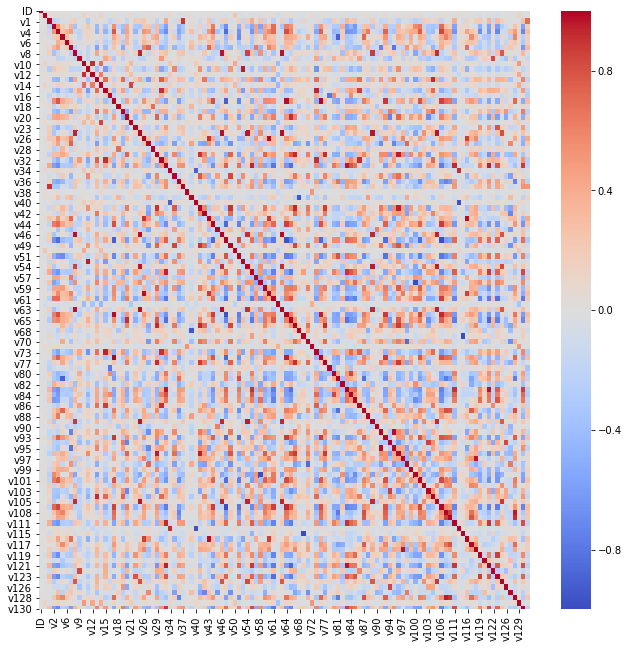

In [7]:
plt.figure(figsize=(11,11))
sb.heatmap(data.corr(), cmap='coolwarm')

A few observations about the data:
 - there are clearly some missing values that need to be dealt with
 - 114 features are numeric, and the rest are categorical or string - the latter will need to be encoded.
 - there are both some highly positively and negatively correlated values.
 
Next, I will deal with the problems highlighted above.

Preprocessing 



In [8]:
#use info method to have a gage on what types of variables are present in the dataset.
data.info()

#since there are many variables in the dataset, I will extract and deal with numerics and
#categorical variables separately.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 133 entries, ID to v131
dtypes: float64(108), int64(6), object(19)
memory usage: 50.7+ MB


In [9]:
numerics = ['int64', 'float64']
numerical_vars = data.select_dtypes(include=numerics).columns

In [10]:
#for numeric variables, I need to impute the missing values and standardize all variables. 
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [11]:
#imputing the missing values with mean value for that column
data[numerical_vars[2:]] = data[numerical_vars[2:]].fillna(data[numerical_vars[2:]].mean())
[col for col in data.columns if data[col].isnull().sum() > 0]
#missing values remaining in what is potentially non-numeric variables in the set

['v3',
 'v22',
 'v30',
 'v31',
 'v52',
 'v56',
 'v91',
 'v107',
 'v112',
 'v113',
 'v125']

In [12]:
categorical_vars = data.select_dtypes(include='object').columns
#removed list
data[categorical_vars].head(10)


,v3,v22,v24,v30,v31,v47,v52,v56,v66,v71,v74,v75,v79,v91,v107,v110,v112,v113,v125
0,C,XDX,C,C,A,C,G,DI,C,F,B,D,E,A,E,B,O,NaN,AU
1,C,GUV,C,C,A,E,G,DY,A,F,B,D,D,B,B,A,U,G,AF
2,C,FQ,E,NaN,A,C,F,AS,A,B,B,B,E,G,C,B,S,NaN,AE
3,C,ACUE,D,C,B,C,H,BW,A,F,B,D,B,B,B,B,J,NaN,CJ
4,C,HIT,E,NaN,A,I,H,NaN,C,F,B,D,C,G,C,A,T,G,Z
5,C,AYX,A,NaN,A,I,K,DX,A,F,B,D,I,G,C,A,D,X,X
6,C,NFD,E,G,A,C,A,AS,A,F,B,D,E,B,B,B,I,NaN,BJ
7,C,AHBW,D,C,A,I,C,DP,C,F,B,D,C,A,E,A,F,M,BY
8,NaN,GKQ,E,NaN,NaN,D,H,AF,B,B,B,B,P,C,D,C,L,NaN,S
9,C,PYF,C,C,A,I,A,NaN,A,F,B,D,C,A,E,A,J,P,E


In [13]:
#impute missing variables from the categorical variables too
data[categorical_vars] = data[categorical_vars].fillna('missing')
[col for col in data.columns if data[col].isnull().sum() > 0]
#looks like no more mising values

[]

In [14]:
#all missing values have been imputed from the dataset, now it is time to encode the string values and standardize the numerical
#will try Column Transformation 
from sklearn.compose import ColumnTransformer

In [15]:
#Create a column transformer that will transform all columns in the X_train data frame.
#The tranformer will encode the string variables and will standardidze the numericals.

colT = ColumnTransformer(transformers=[('numeric', StandardScaler(),data[data.select_dtypes(include=numerics).columns[2:]]),
                          ('string', LabelEncoder(),data[data.select_dtypes(include='object').columns])],remainder='passthrough')


In [16]:
#transform the columns
#data = colT.fit(data)
#data = pd.DataFrame(data,index=np.arange(len(X_train)))
#problems transforming. Will do without ColumnTransformer

In [17]:
categorical_vars

Index(['v3', 'v22', 'v24', 'v30', 'v31', 'v47', 'v52', 'v56', 'v66', 'v71',
       'v74', 'v75', 'v79', 'v91', 'v107', 'v110', 'v112', 'v113', 'v125'],
      dtype='object')

In [18]:
#enumerate categorical (string) columns columns
for val in categorical_vars:
    le_val = LabelEncoder()
    data[val] = le_val.fit_transform(data[val])
    
#Encoding string values
#ordinal_label = {k: i for i, k in enumerate(X_train['v1'].unique(), 0)}
#X_train['v1'] = X_train['v1'].map(ordinal_label)

In [19]:
data[categorical_vars].head()

,v3,v22,v24,v30,v31,v47,v52,v56,v66,v71,v74,v75,v79,v91,v107,v110,v112,v113,v125
0,2,11572,2,2,0,2,6,74,2,3,1,3,4,0,4,1,14,34,21
1,2,5418,2,2,0,4,6,89,0,3,1,3,3,1,1,0,20,15,6
2,2,4969,4,7,0,2,5,15,0,1,1,1,4,6,2,1,18,34,5
3,2,1055,3,2,1,2,7,41,0,3,1,3,1,1,1,1,9,34,64
4,2,5628,4,7,0,7,7,107,2,3,1,3,2,6,2,0,19,15,89


In [20]:
#now we need to standardize all columns except for target and ID that we do not care about
variables = data.columns[2:]
variables

Index(['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       ...
       'v122', 'v123', 'v124', 'v125', 'v126', 'v127', 'v128', 'v129', 'v130',
       'v131'],
      dtype='object', length=131)

In [21]:
#standardize the numerical columns
scaler = StandardScaler()
new_data = scaler.fit_transform(data[variables])
new_data #new_data is an array, so need to come back to a dataframe

array([[-3.56351230e-01,  5.65639016e-01, -1.32468777e-01, ...,
        -4.47779314e-01, -1.36095581e+00,  1.33065520e+00],
       [-1.08639922e-15,  3.18522140e-15, -1.32468777e-01, ...,
        -4.47779314e-01,  4.44540066e-15, -2.09820141e-15],
       [-8.35668348e-01, -9.66311124e-01, -1.32468777e-01, ...,
         2.42554791e+00, -1.10095208e+00, -6.54525241e-01],
       ...,
       [ 2.95538822e-01, -1.08447359e+00, -1.32468777e-01, ...,
        -4.47779314e-01, -1.37691816e-02,  2.30717834e-01],
       [-1.08639922e-15,  3.18522140e-15, -1.32468777e-01, ...,
         9.88884296e-01,  4.44540066e-15, -2.09820141e-15],
       [-1.08639922e-15,  3.18522140e-15, -1.32468777e-01, ...,
        -4.47779314e-01,  4.44540066e-15, -2.09820141e-15]])

In [22]:
new_data = pd.DataFrame(new_data, columns = variables)
new_data.head()
#now, the last thing to do is simply add the target variable and the dataset is ready for splitting

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,-3.563512e-01,5.656390e-01,-0.132469,-2.549989e-01,-5.395582e-01,3.771391e-01,1.584948e+00,-7.082961e-01,6.800609e-01,-0.990781,...,8.881061e-01,-8.066500e-01,-5.557939e-01,-0.978675,3.464854e-01,-1.044882e-01,-1.051132e-02,-0.447779,-1.360956e+00,1.330655e+00
1,-1.086399e-15,3.185221e-15,-0.132469,6.163877e-15,2.870885e-01,1.000310e-15,2.933731e-14,3.838029e-01,-1.604346e-14,-0.410300,...,5.288276e-15,-7.278801e-15,-2.008248e-01,-1.568800,8.808361e-15,3.995000e-15,-9.221202e-02,-0.447779,4.445401e-15,-2.098201e-15
2,-8.356683e-01,-9.663111e-01,-0.132469,3.116943e-01,-2.216891e+00,3.486294e+00,3.297260e+00,-7.050973e-01,2.532711e+00,-0.802517,...,1.880451e+00,-5.567908e-01,-5.698516e-01,-1.608142,2.660448e-01,5.566924e-01,-1.121587e+00,2.425548,-1.100952e+00,-6.545252e-01
3,-1.014818e+00,3.761433e-01,-0.132469,9.766887e-02,1.865345e+00,-7.526631e-01,-1.124372e+00,-6.324232e-01,-3.863939e-02,3.339294,...,1.574347e-01,-8.973019e-01,-5.769016e-01,0.713019,-6.819957e-01,-2.347967e-01,-5.161788e-02,0.988884,-2.643246e-01,-8.222397e-01
4,-1.086399e-15,3.185221e-15,-0.132469,6.163877e-15,2.186519e-14,1.000310e-15,2.933731e-14,1.907164e-15,-1.604346e-14,-0.598564,...,5.288276e-15,-7.278801e-15,1.609573e-15,1.696562,8.808361e-15,3.995000e-15,-4.913328e-15,-0.447779,4.445401e-15,-2.098201e-15


In [23]:
new_data = new_data.join(data['target'])
new_data.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v123,v124,v125,v126,v127,v128,v129,v130,v131,target
0,-3.563512e-01,5.656390e-01,-0.132469,-2.549989e-01,-5.395582e-01,3.771391e-01,1.584948e+00,-7.082961e-01,6.800609e-01,-0.990781,...,-8.066500e-01,-5.557939e-01,-0.978675,3.464854e-01,-1.044882e-01,-1.051132e-02,-0.447779,-1.360956e+00,1.330655e+00,1
1,-1.086399e-15,3.185221e-15,-0.132469,6.163877e-15,2.870885e-01,1.000310e-15,2.933731e-14,3.838029e-01,-1.604346e-14,-0.410300,...,-7.278801e-15,-2.008248e-01,-1.568800,8.808361e-15,3.995000e-15,-9.221202e-02,-0.447779,4.445401e-15,-2.098201e-15,1
2,-8.356683e-01,-9.663111e-01,-0.132469,3.116943e-01,-2.216891e+00,3.486294e+00,3.297260e+00,-7.050973e-01,2.532711e+00,-0.802517,...,-5.567908e-01,-5.698516e-01,-1.608142,2.660448e-01,5.566924e-01,-1.121587e+00,2.425548,-1.100952e+00,-6.545252e-01,1
3,-1.014818e+00,3.761433e-01,-0.132469,9.766887e-02,1.865345e+00,-7.526631e-01,-1.124372e+00,-6.324232e-01,-3.863939e-02,3.339294,...,-8.973019e-01,-5.769016e-01,0.713019,-6.819957e-01,-2.347967e-01,-5.161788e-02,0.988884,-2.643246e-01,-8.222397e-01,1
4,-1.086399e-15,3.185221e-15,-0.132469,6.163877e-15,2.186519e-14,1.000310e-15,2.933731e-14,1.907164e-15,-1.604346e-14,-0.598564,...,-7.278801e-15,1.609573e-15,1.696562,8.808361e-15,3.995000e-15,-4.913328e-15,-0.447779,4.445401e-15,-2.098201e-15,1


In [24]:
new_data.shape
#all variables but the ID variable, which we do not need anyway

(50000, 132)

Preprocessing is done. 

Now it is time to split the data to test and training set and move to feature selection. For feature selection I will use filter methods, correlation and an embedded method to see how much we can reduce the number of features.

In [25]:
from sklearn.model_selection import train_test_split
X = new_data.drop('target', axis=1)
y = new_data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [26]:
# I keep a copy of the dataset with all the variables to measure the performance of machine learning models

X_train_original = X_train.copy()
X_test_original = X_test.copy()

In [27]:
from sklearn.feature_selection import VarianceThreshold

Removal of constant and semi constant features

In [28]:
sel = VarianceThreshold(threshold=0)
sel.fit(X_train)  # fit finds the features with low variance
sum(sel.get_support()) # how many not constant? Looks like most except one..


131

In [29]:
features_to_keep = X_train.columns[sel.get_support()]
features_to_keep

Index(['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       ...
       'v122', 'v123', 'v124', 'v125', 'v126', 'v127', 'v128', 'v129', 'v130',
       'v131'],
      dtype='object', length=131)

In [30]:
# keep only features that are NOT constant
X_train = X_train[features_to_keep]
X_test = X_test[features_to_keep]

X_train.shape, X_test.shape

((33500, 131), (16500, 131))

In [31]:
#filter methods: removing quasi-constant features
sel=  VarianceThreshold(threshold=0.01)
sel.fit(X_train)

sum(sel.get_support())
features_to_keep = X_train.columns[sel.get_support()]
features_to_keep
#looks like there are no quasi constant features left

Index(['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       ...
       'v122', 'v123', 'v124', 'v125', 'v126', 'v127', 'v128', 'v129', 'v130',
       'v131'],
      dtype='object', length=131)

In [32]:
X_train = X_train[features_to_keep]
X_test = X_test[features_to_keep]

X_train.shape, X_test.shape
#by removing contant features, there are no more features that need removing

((33500, 131), (16500, 131))

Removal of duplicate features

In [33]:
# check for duplicated features in the training set
duplicated_feat = []
for i in range(0, len(X_train.columns)): #for i that takes column positions from 0 to 131 (bcs this is the length of set of cols, 131)
    col_1 = X_train.columns[i] #first item is the first column

    for col_2 in X_train.columns[i + 1:]: #then, the second item starts being the next column (and moves until the end of the column list of 131)
        if X_train[col_1].equals(X_train[col_2]): #if the first column equals the second column
            duplicated_feat.append(col_2) #we mark the second column as a duplicate and start over - see if second and third are dups, then third and fourth and so on until 131.
            
len(duplicated_feat) 
#no duplicated columns

0

Use correlation to remove features

In [34]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.8)
print('There are', len(set(corr_features)), 'correlated features in the dataset' )


There are 56 correlated features in the dataset


In [35]:
X_train = X_train.drop(corr_features, axis=1)
X_test = X_test.drop(corr_features, axis=1)

In [36]:
len(X_train.columns)
#managed to reduce the set by 56 features

75

In [37]:
len(X_test.columns)

75

Remove features using univariate approaches.

To apply the univariate appriaches I will focus on variables in the training set that were originally numerics. I will check if they are linear, as this is the pre-requisite for using the univariate approach.


In [38]:
#firstly, extract the column names of the set that were originally numeric variables by:
#a) creating a list of vars in the current trainign set as we have it
new_list =  list(X_train.columns)
len(new_list)

75

In [39]:
#b) creating a list of variables from the array that was the categorical variables during the pre-processing stage
old_cat_list = list(categorical_vars)
len(old_cat_list)

19

In [40]:
#c) subtracting old_cat_list from new_list
#(list(set(li1) - set(li2))) 
new_num_list = set(new_list) - set(old_cat_list) 
len(new_num_list)
#there are 58 vars in the new X_train set that used to be numerics. 
#I will focus on them when applying the univariate filter methods.

58

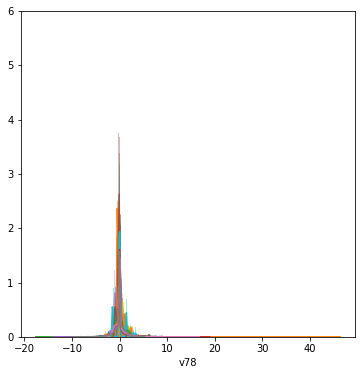

In [41]:
plt.figure(figsize=(6,6))
for var in new_num_list:
                 sb.distplot(X_train[var], hist=True)
#there are some variables that probably do not follow a normal distribution, but  
#we can roughly see some sort of a bell curve when plotting the distribution of each variable in the training set.
#will assume this is enough to use the univariate F-score selection method.

In [42]:
#firstly, import the libraries
from sklearn.feature_selection import f_classif, f_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [43]:
# calculate the univariate statistical measure between
# each of the previously numeric variables and the target
# similarly to chi2, the output is the array of f-scores
# and an array of pvalues, which are the ones we will compare

univariate = f_classif(X_train[new_num_list], y_train)
univariate

(array([1.71142627e+00, 7.47910133e+00, 3.68203246e+01, 1.78086584e+01,
        1.80612828e+01, 9.47329755e-01, 1.80864587e+00, 1.93048623e+01,
        2.10162246e+01, 2.88538891e+01, 4.85675074e+01, 3.55236549e+00,
        6.23437566e-01, 7.82293753e+00, 1.66549496e+01, 3.13068338e+01,
        6.80872825e+01, 6.14390731e+01, 1.87990311e+02, 1.52671729e-02,
        1.24261501e+00, 3.09562089e+02, 1.56336000e+01, 5.75428025e+00,
        3.49621780e+00, 3.50872708e+01, 1.55148336e+01, 9.16952603e+00,
        4.39043365e+01, 8.30280369e+02, 4.63627289e+01, 6.43640896e+01,
        5.40817426e+01, 1.92484721e+00, 2.42990976e+01, 2.17582842e+01,
        3.40760071e+00, 1.68297182e+00, 2.09786290e+03, 1.47494627e+01,
        1.33089782e+01, 6.65507507e+02, 2.12412906e+00, 2.65929283e+01,
        1.12594345e+01, 1.37351158e+02, 2.70216137e+00, 4.85603770e-02,
        1.39903088e+01, 3.10804616e+02, 1.17254762e+01, 5.40322496e-02,
        6.44688847e+02, 1.80667952e+01, 3.82228220e+00, 7.828527

In [44]:
# let's add the variable names and order it for clearer visualisation
univariate = pd.Series(univariate[1])
univariate.index = X_train[new_num_list].columns
univariate.sort_values(ascending=False, inplace=True)

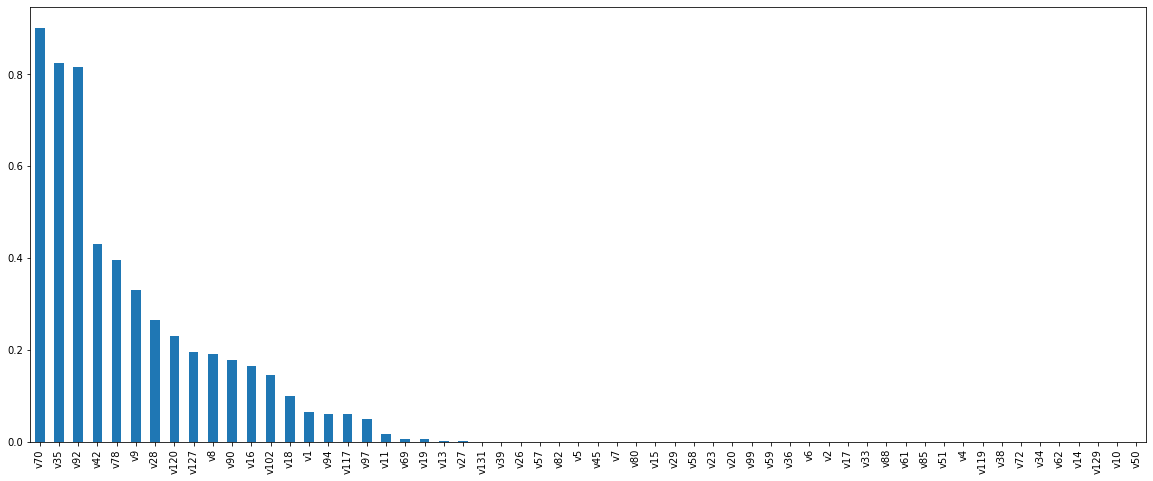

In [45]:
# and now let's plot the p values
univariate.sort_values(ascending=False).plot.bar(figsize=(20, 8))
#while most variables seem to have enough predictive power (p=0.000 or very close), there are easily 13-14 vars that
#for sure are under the 95% confidence level.

In [46]:
#in the next step, I will select the top 58-20=38 to remove the bottom 20 values.
sel_ = SelectKBest(f_classif, k=38).fit(X_train[new_num_list].fillna(0), y_train)
X_train[new_num_list].columns[sel_.get_support()]

Index(['v2', 'v7', 'v80', 'v29', 'v58', 'v59', 'v88', 'v19', 'v45', 'v36',
       'v4', 'v85', 'v72', 'v34', 'v5', 'v6', 'v82', 'v13', 'v17', 'v10',
       'v33', 'v51', 'v61', 'v20', 'v23', 'v50', 'v57', 'v39', 'v129', 'v99',
       'v27', 'v38', 'v26', 'v62', 'v131', 'v14', 'v15', 'v119'],
      dtype='object')

In [47]:
#make lists of variables we want to keep
new_numeric = list(X_train[new_num_list].columns[sel_.get_support()])

In [48]:
#remaining categorical variables 
new_cat_list = set(new_list) - set(new_num_list) 
list(new_cat_list)

['v22',
 'v30',
 'v3',
 'v107',
 'v66',
 'v71',
 'v112',
 'v31',
 'v91',
 'v47',
 'v125',
 'v56',
 'v113',
 'v52',
 'v74',
 'v24',
 'v79']

In [49]:
#add these two list into one new list
new_varlist = list(new_cat_list) + new_numeric
len(new_varlist)
#17+38 columns = 55

55

In [50]:
#transform X_train so that it how has 55 features
X_train = X_train[new_varlist]
X_train.shape

(33500, 55)

In [51]:
#make sure the X_test set has the same vars
new_varlist = list(X_train.columns)

In [52]:
X_test = X_test[new_varlist]
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16500 entries, 33553 to 28203
Data columns (total 55 columns):
v22     16500 non-null float64
v30     16500 non-null float64
v3      16500 non-null float64
v107    16500 non-null float64
v66     16500 non-null float64
v71     16500 non-null float64
v112    16500 non-null float64
v31     16500 non-null float64
v91     16500 non-null float64
v47     16500 non-null float64
v125    16500 non-null float64
v56     16500 non-null float64
v113    16500 non-null float64
v52     16500 non-null float64
v74     16500 non-null float64
v24     16500 non-null float64
v79     16500 non-null float64
v2      16500 non-null float64
v7      16500 non-null float64
v80     16500 non-null float64
v29     16500 non-null float64
v58     16500 non-null float64
v59     16500 non-null float64
v88     16500 non-null float64
v19     16500 non-null float64
v45     16500 non-null float64
v36     16500 non-null float64
v4      16500 non-null float64
v85     16500 non-n

Lastly, I will apply an embeded method for feature selection. In this case, since there are both clasification and continuous variables in the dataset, a hybrid method - recursive feature elimination.

In [53]:
#importing the necessary libraries
import xgboost as xgb
from sklearn.metrics import roc_auc_score, r2_score

In [54]:
# the first step of this procedure  consists in building
# a machine learning algorithm using all the available features
# and then determine the importance of the features according
# to the algorithm

# set the seed for reproducibility
#seed_val = 1000000000
#np.random.seed(seed_val)

# build initial model using all the features
#model_all_features = xgb.XGBClassifier(
#    nthread=10, max_depth=4, n_estimators=500, learning_rate=0.05)

#model_all_features.fit(X_train, y_train)

# calculate the roc-auc in the test set
#y_pred_test = model_all_features.predict_proba(X_test)[:, 1]
#auc_score_all = roc_auc_score(y_test, y_pred_test)
#print('Test all features xgb ROC AUC=%f' % (auc_score_all))

In [55]:
# the second step consist of deriving the importance of 
# each feature and ranking them from the least to the most
# important

# get feature name and importance
#features = pd.Series(model_all_features.feature_importances_)
#features.index = X_train.columns

# sort the features by importance
#features.sort_values(ascending=True, inplace=True)

# plot
#features.plot.bar(figsize=(20,6))

In [56]:
# view the list of ordered features
#features = list(features.index)
#features

In [57]:
# the final step consists in removing one at a time
# all the features, from the least to the most
# important, and build an xgboost at each round.

# once we build the model, we calculate the new roc-auc
# if the new roc-auc is smaller than the original one
# (with all the features), then that feature that was removed
# was important, and we should keep it.
# otherwise, we should remove the feature

# recursive feature elimination:

# first we arbitrarily set the drop in roc-auc
# if the drop is below this threshold,
# the feature will be removed
#tol = 0.0005

#print('doing recursive feature elimination')

# we initialise a list where we will collect the
# features we should remove
#features_to_remove = []

# set a counter to know how far ahead the loop is going
#count = 1

# now we loop over all the features, in order of importance:
# remember that features is the list of ordered features
# by importance
#for feature in features:
#    print()
#    print('testing feature: ', feature, ' which is feature ', count,
#          ' out of ', len(features))
#    count = count + 1

    # initialise model
#    model_int = xgb.XGBClassifier(
#        nthread=10, max_depth=4, n_estimators=500, learning_rate=0.05)

    # fit model with all variables minus the removed features
    # and the feature to be evaluated
#    model_int.fit(
#        X_train.drop(features_to_remove + [feature], axis=1), y_train)

    # make a prediction over the test set
#    y_pred_test = model_int.predict_proba(
#        X_test.drop(features_to_remove + [feature], axis=1))[:, 1]

    # calculate the new roc-auc
#    auc_score_int = roc_auc_score(y_test, y_pred_test)
#    print('New Test ROC AUC={}'.format((auc_score_int)))

    # print the original roc-auc with all the features
#    print('All features Test ROC AUC={}'.format((auc_score_all)))

    # determine the drop in the roc-auc
#    diff_auc = auc_score_all - auc_score_int

    # compare the drop in roc-auc with the tolerance
    # we set previously
#    if diff_auc >= tol:
#        print('Drop in ROC AUC={}'.format(diff_auc))
#        print('keep: ', feature)
#        print
#    else:
#        print('Drop in ROC AUC={}'.format(diff_auc))
#        print('remove: ', feature)
#        print
        # if the drop in the roc is small and we remove the
        # feature, we need to set the new roc to the one based on
        # the remaining features
#        auc_score_all = auc_score_int
        
        # and append the feature to remove to the collecting
        # list
#        features_to_remove.append(feature)

# now the loop is finished, we evaluated all the features
#print('DONE!!')
#print('total features to remove: ', len(features_to_remove))

# determine the features to keep (those we won't remove)
#features_to_keep = [x for x in features if x not in features_to_remove]
#print('total features to keep: ', len(features_to_keep))

In [58]:
# capture the 56 selected features
#seed_val = 1000000000
#np.random.seed(seed_val)

# build initial model
#final_xgb = xgb.XGBClassifier(
#    nthread=10, max_depth=4, n_estimators=500, learning_rate=0.05)

# fit the model with the selected features
#final_xgb.fit(X_train[features_to_keep], y_train)

# make predictions
#y_pred_test = final_xgb.predict_proba(X_test[features_to_keep])[:, 1]

# calculate roc-auc
#auc_score_final = roc_auc_score(y_test, y_pred_test)
#print('Test selected features ROC AUC=%f' % (auc_score_final))
#print('Test all features ROC AUC=%f' % (auc_score_all))

The method was highly computationally expensive, but has yielded to no gain in the ROC AUC score. For that, I will apply one more strategy, which is the univariate ROC 

In [59]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error

In [60]:
# loop to build a tree, make predictions and get the roc-auc
# for each feature of the train set

roc_values = []
for feature in X_train.columns:
    clf = DecisionTreeClassifier()
    clf.fit(X_train[feature].fillna(0).to_frame(), y_train)
    y_scored = clf.predict_proba(X_test[feature].fillna(0).to_frame())
    roc_values.append(roc_auc_score(y_test, y_scored[:, 1]))

In [61]:
# let's add the variable names and order it for clearer visualisation
roc_values = pd.Series(roc_values)
roc_values.index = X_train.columns
roc_values.sort_values(ascending=False)

v56     0.657701
v79     0.629331
v10     0.629323
v47     0.605492
v113    0.603787
v50     0.598263
v66     0.589110
v31     0.587932
v14     0.578386
v129    0.577395
v62     0.572277
v72     0.546037
v24     0.529320
v22     0.524865
v30     0.519863
v38     0.518589
v125    0.516064
v112    0.515493
v39     0.511906
v34     0.510111
v71     0.509966
v91     0.509003
v107    0.509003
v52     0.507517
v51     0.507410
v20     0.506433
v4      0.506299
v61     0.505987
v33     0.505804
v19     0.505742
v82     0.505389
v26     0.505148
v3      0.504952
v131    0.504177
v23     0.504087
v13     0.503813
v88     0.503418
v5      0.503357
v27     0.503225
v45     0.503199
v15     0.502961
v29     0.502777
v74     0.501981
v57     0.501276
v2      0.501275
v85     0.500893
v119    0.500664
v17     0.500511
v58     0.500157
v36     0.499348
v6      0.498908
v7      0.498614
v59     0.495478
v99     0.494966
v80     0.493636
dtype: float64

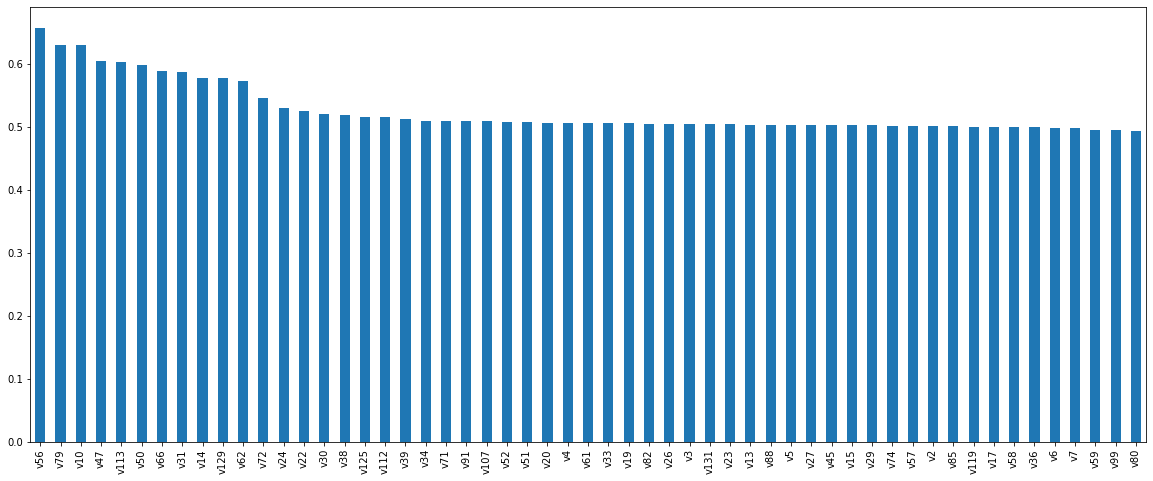

In [62]:
# and now let's plot
roc_values.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [63]:
# a roc auc value of 0.5 indicates random decision
# let's check how many features show a roc-auc value
# higher than random

len(roc_values[roc_values > 0.5])

49

49 out of 55 show ROC values above 0.5. This means that we can remove 6 features that have ROC values under 0.5 from the test set. v36, v6, v7, v59, v99, v80.

In [68]:
X_train = X_train.drop(['v36','v6','v7','v59','v99','v80'], axis=1)
X_test = X_test.drop(['v36','v6','v7','v59','v99','v80'], axis=1)

Finally, I will apply the Lasso regularization method. Regularization applies a penalty to the parameters od a machine learning model. In Lasso case, the regularization penalizes some parameters by shrinking them to zero.

In [83]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [71]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [72]:
# fit a lasso and selet features, make sure to select l1
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1'))
sel_.fit(scaler.transform(X_train), y_train)

# remove features with zero coefficient from dataset
# and parse again as dataframe (output of sklearn is
# numpy array)
X_train_lasso = pd.DataFrame(sel_.transform(X_train))
X_test_lasso = pd.DataFrame(sel_.transform(X_test))

# add the columns name
X_train_lasso.columns = X_train.columns[(sel_.get_support())]
X_test_lasso.columns = X_train.columns[(sel_.get_support())]

/Users/user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [73]:
X_train_lasso.shape, X_test_lasso.shape
#method removed one feature

((33500, 48), (16500, 48))

Now I will create a machine learning pipeline. This pipeline will allow to apply the Random Forest machine learning algorithm on the original test set and a a test set that has been modified by applying the different feature selection techniques.

In [84]:
# create a function to build random forests and compare performance in train and test set

def run_randomForests(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)
    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [85]:
# original
run_randomForests(X_train_original, X_test_original, y_train, y_test)

Train set
Random Forests roc-auc: 0.7223121578348102
Test set
Random Forests roc-auc: 0.7126858026524834


In [86]:
# filter methods 
run_randomForests(X_train, X_test, y_train, y_test)

Train set
Random Forests roc-auc: 0.7289328873080912
Test set
Random Forests roc-auc: 0.721669482474151


Applying the variety of filter methods has yielded to only a slightly better ROC AUC score than leaving the test set as it is. That being said, it is stilla win to having a more simpler model with 48 features rather than 133.

In [87]:
from sklearn.metrics import classification_report
def forestreports(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    prediction = rf.predict(X_test)
    print(classification_report(prediction,y_test))

In [88]:
#original
forestreports(X_train_original, X_test_original, y_train, y_test)

/Users/user/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.30      0.44      0.35      2738
           1       0.88      0.80      0.83     13762

    accuracy                           0.74     16500
   macro avg       0.59      0.62      0.59     16500
weighted avg       0.78      0.74      0.75     16500



In [89]:
#filter methods
forestreports(X_train, X_test, y_train, y_test)

/Users/user/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.32      0.47      0.38      2751
           1       0.88      0.80      0.84     13749

    accuracy                           0.75     16500
   macro avg       0.60      0.63      0.61     16500
weighted avg       0.79      0.75      0.76     16500



In conclusion, I have gone through the standard pre-processing steps:
 - enumerated string variables,
 - dealt with missing values,
 - standardized numeric values.
 
Then, I applied the following feature selection techniques:
 - filter methods: removed constant features, duplicates and correlated features,
 - filter methods: using the F-score, kept only features with best p-values,
 - filter methods: using ROC AUC values, removed features with ROC-AUC score lower than 0.5
 - Used a hybrid feature selection techniques that did not indicate an improvement in the roc-auc score after removing indicated features.
 - embedded methods: used Lasso regularization method to remove one value that was penalized enough to represent a zero in the model.
 
As a result I got a model that is only slightly (!) more accurate, with only slightly higher F-score, same precision for predicting target==1, but 2 percentage points higher precision predicting target==0. That being said, the result has yielded to a model that had 48 farame 
